## Customer Churn Prediction Using Artificial Nueral Network

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as  np
%matplotlib inline

In [142]:
url = "https://raw.githubusercontent.com/YuNakamura2020/Data/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
df.shape

(7043, 21)

## Drop customerID column as it is of no use

In [144]:
df.drop('customerID',axis=1,inplace=True)

In [145]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [146]:
# TotalCharges should be float but it is an object...
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [147]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [148]:
# Some values seems to be not numbers but blank string.
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [149]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [150]:
df.shape

(7043, 20)

In [151]:
df.iloc[488].TotalCharges

' '

In [152]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [153]:
# Remove rows with spaces in TotalCharge
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [154]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [155]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

c:\Projects\Python\Python_practice\.venv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [156]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [157]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

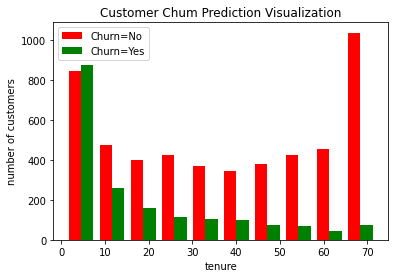

In [158]:
tenure_churn_no = df1[df1.Churn=="No"].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('number of customers')
plt.title('Customer Chum Prediction Visualization')

plt.hist([tenure_churn_no, tenure_churn_yes], color=['red','green'], label=['Churn=No', 
'Churn=Yes'])
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

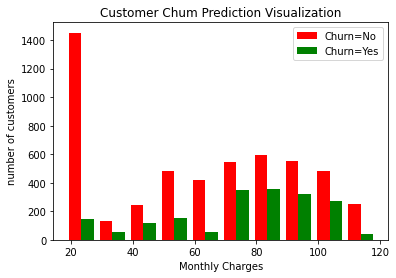

In [159]:
mc_churn_no = df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('number of customers')
plt.title('Customer Chum Prediction Visualization')

plt.hist([mc_churn_no, mc_churn_yes], color=['red','green'], label=['Churn=No', 
'Churn=Yes'])
plt.legend()
plt.show

In [160]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}:{df[column].unique()}')

#### Some of the columns have no internet service or no phone service, which can be replaced with a simple No
#### Categorical values has to conver to the number for machine learning 

In [161]:
df1.replace('No internet service', 'No', inplace=True)

c:\Projects\Python\Python_practice\.venv\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [162]:
df1.replace('No phone service', 'No', inplace=True)

In [163]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


#### Convert Yes and No to 1 or 0

In [164]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [165]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

c:\Projects\Python\Python_practice\.venv\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [166]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [167]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [168]:
df1.gender.unique()

array([1, 0], dtype=int64)

#### One hot encording for categorical columns

In [169]:
df2 = pd.get_dummies(data = df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [170]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [171]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1401,1,1,0,0,4,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0
269,1,0,1,0,71,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1411,0,1,0,0,29,1,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0
1651,0,1,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
761,1,0,0,0,22,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [172]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [173]:
cols_to_scale=['tenure', 'TotalCharges', 'MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [174]:
df2[cols_to_scale]

,tenure,TotalCharges,MonthlyCharges
0,0.000000,0.001275,0.115423
1,0.464789,0.215867,0.385075
2,0.014085,0.010310,0.354229
3,0.619718,0.210241,0.239303
4,0.014085,0.015330,0.521891
...,...,...,...
7038,0.323944,0.227521,0.662189
7039,1.000000,0.847461,0.845274
7040,0.140845,0.037809,0.112935
7041,0.042254,0.033210,0.558706


#### Train test split

In [193]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [194]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [54]:
X_test.shape

(1407, 26)

In [55]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


#### Build a moadel (ANN)

In [56]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26, ), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 402us/step - loss: 0.4976 - accuracy: 0.7536
Epoch 2/100
176/176 [==============================] - 0s 382us/step - loss: 0.4298 - accuracy: 0.7904
Epoch 3/100
176/176 [==============================] - 0s 370us/step - loss: 0.4196 - accuracy: 0.8012
Epoch 4/100
176/176 [==============================] - 0s 376us/step - loss: 0.4150 - accuracy: 0.8043
Epoch 5/100
176/176 [==============================] - 0s 376us/step - loss: 0.4115 - accuracy: 0.8062
Epoch 6/100
176/176 [==============================] - 0s 393us/step - loss: 0.4094 - accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 0s 404us/step - loss: 0.4074 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 467us/step - loss: 0.4062 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 0s 399us/step - loss: 0.4050 - accuracy: 0.8124
Epoch 10/100
176/176 [==============================] - 0s 399us/step - l

In [57]:
yp=model.predict(X_test)

In [58]:
yp[:5]

array([[0.3842214 ],
       [0.5791816 ],
       [0.00943917],
       [0.6881981 ],
       [0.47676882]], dtype=float32)

In [59]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [60]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [61]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [62]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       999
           1       0.64      0.46      0.54       408

    accuracy                           0.77      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [63]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[893, 106],
       [220, 188]])>

Text(69.0, 0.5, 'Truth')

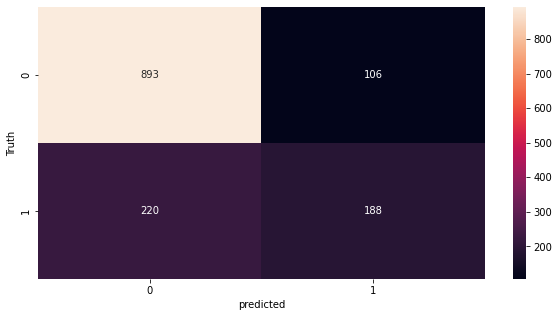

In [66]:
plt.figure(figsize=(10, 5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [67]:
y_test.shape

(1407,)

#### Exercise

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score

In [81]:
url_bank = 'https://raw.githubusercontent.com/YuNakamura2020/Data/main/Churn_Modelling.csv'
df_bank = pd.read_csv(url_bank)
df_bank.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
df_bank.shape

(10000, 14)

In [83]:
df_bank.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace = True)

In [84]:
df_bank.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

dropna(df_bank, axis=0, how="any", thresh=None, subset=None, inplace=TrueA)

In [79]:
df_bank.dropna().shape

(10000, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

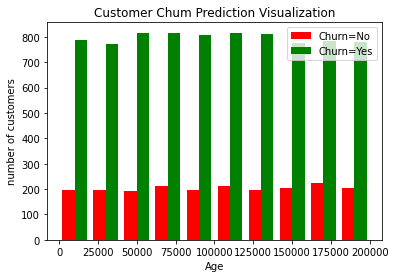

In [94]:
tenure_churn_no = df_bank[df_bank.Exited==1].EstimatedSalary
tenure_churn_yes = df_bank[df_bank.Exited==0].EstimatedSalary

plt.xlabel('Age')
plt.ylabel('number of customers')
plt.title('Customer Chum Prediction Visualization')

plt.hist([tenure_churn_no, tenure_churn_yes], color=['red','green'], label=['Churn=No', 
'Churn=Yes'])
plt.legend()
plt.show

In [97]:
df_bank['Gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [98]:
df_bank.Gender.unique()

array([1, 0], dtype=int64)

In [103]:
df_bank2 = pd.get_dummies(data = df_bank, columns=['Geography'])
df_bank2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [105]:
df_bank2.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [108]:
df_bank2
cols_to_scale=['CreditScore', 'Age','Tenure', 'Balance', 'EstimatedSalary']
scaler = MinMaxScaler()
df_bank2[cols_to_scale]=scaler.fit_transform(df_bank2[cols_to_scale])

In [110]:
for col in df_bank2:
    print(f'{col}:{df_bank2[col].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [195]:
X=df_bank2.drop('Exited', axis='columns')
y=df_bank2['Exited']
X.shape

(10000, 12)

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [198]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [182]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,2,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,2,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,1,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,2,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,2,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,1,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,2,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,1,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,1,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,1,1,0,0.567526,1,0,0


In [183]:
len(X_train.columns)

12

In [200]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12, ), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.7091
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.7961
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8055
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.8116
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8121
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8138
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8152
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8165
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4243 - accura

In [185]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 12, 12)            12        
_________________________________________________________________
dense_25 (Dense)             (None, 12, 5)             65        
_________________________________________________________________
dense_26 (Dense)             (None, 12, 1)             6         
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [201]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 948us/step - loss: 0.3519 - accuracy: 0.8530


[0.35190340876579285, 0.8529999852180481]

In [202]:
yp = model.predict(X_test)

In [204]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [205]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [206]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.70      0.48      0.57       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'true')

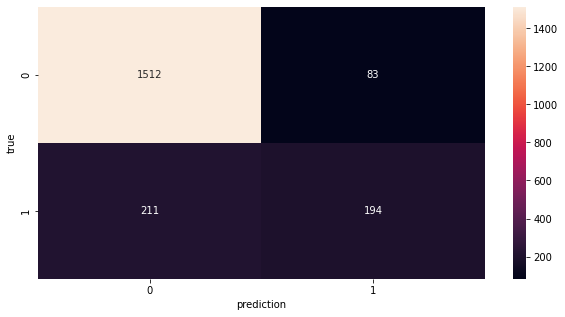

In [214]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
cm

plt.figure(figsize=(10,5))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel("prediction")
plt.ylabel("true")